# Dados

https://www.seade.gov.br/coronavirus/

# Aula 01 - Entendendo a Série Temporal

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/allanspadini/Prophet_covid/raw/main/dados_covid_sp.zip'

In [ ]:
dados = pd.read_csv(url, sep=";")

In [ ]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Presidente Prudente,9,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de São José do Rio Preto,14,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Campinas,4,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [ ]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (20,8)

In [ ]:
import seaborn as sns

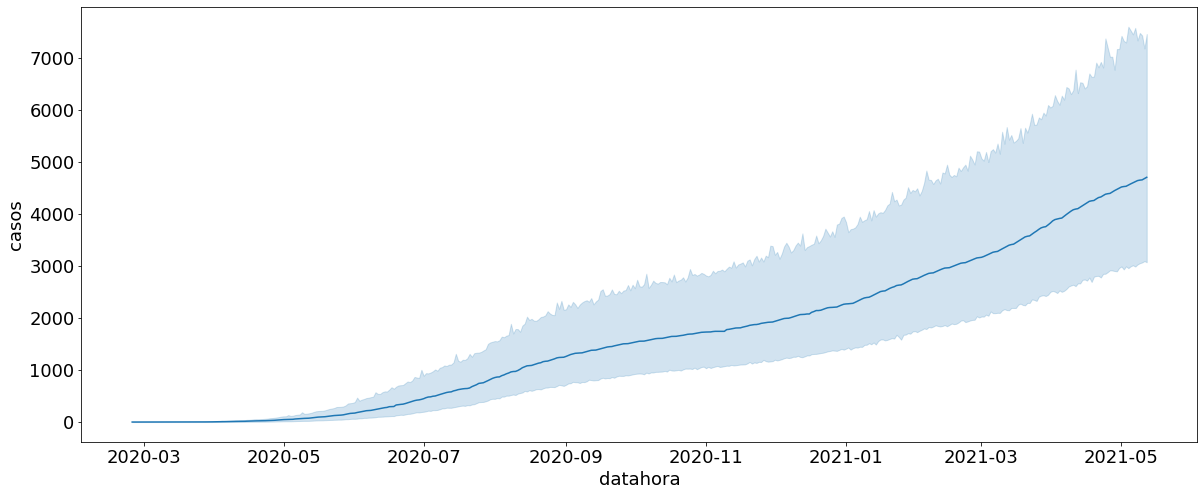

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados)

In [ ]:
dados_sp = dados.query('nome_munic == "São Paulo"')

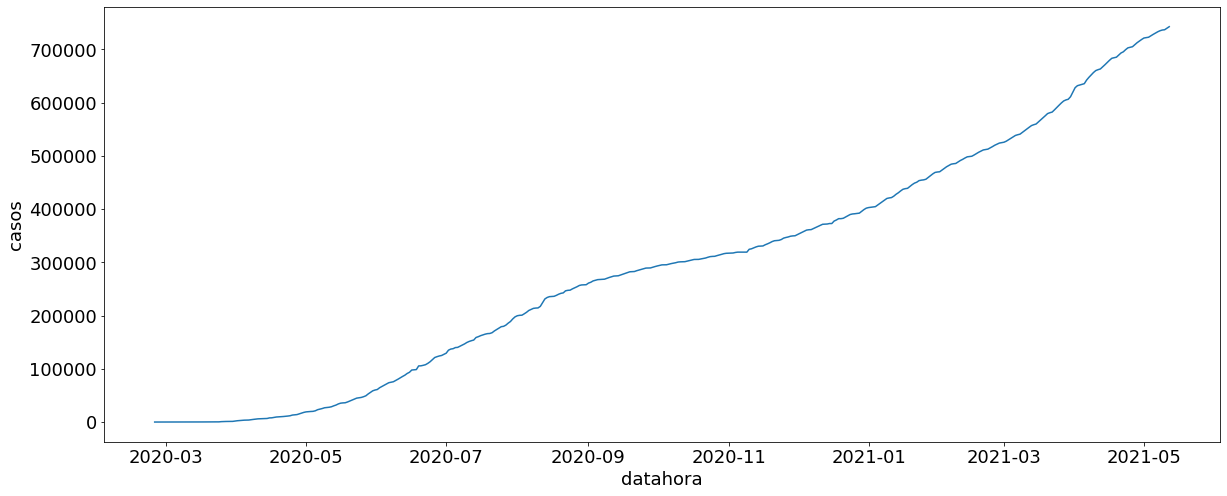

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)

In [ ]:
import numpy as np

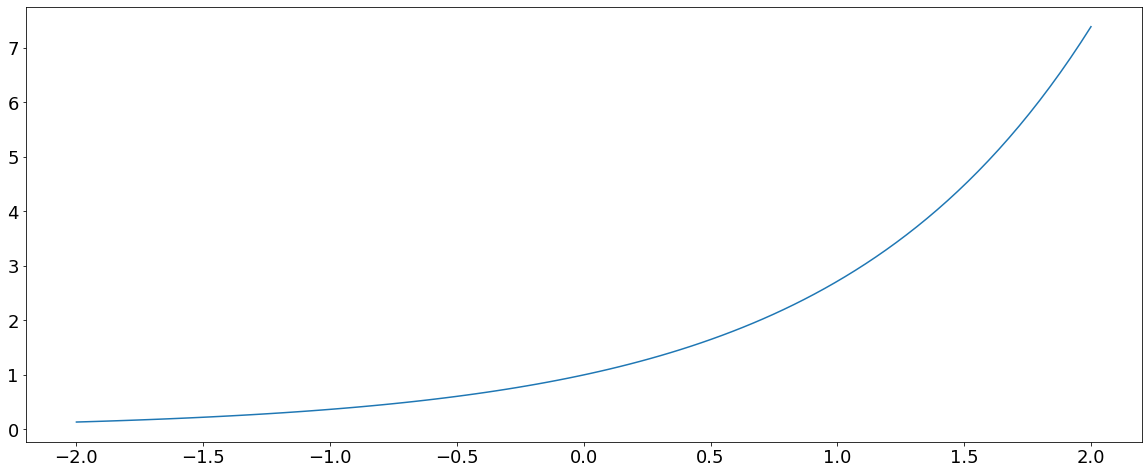

In [ ]:
#eˆx

eixo_x = np.linspace(-2, 2, 100)
y_exp = np.exp(eixo_x)

sns.lineplot(x=eixo_x,y=y_exp)

$$ log_2 2  = 1 $$
$$ log_2 2^x = x $$


$$ log_e e^x = x $$


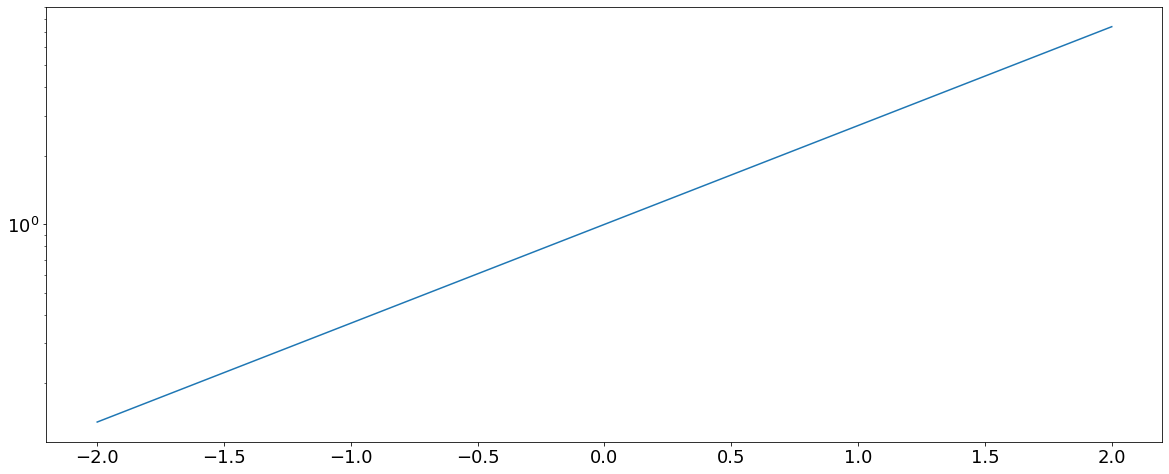

In [ ]:
sns.lineplot(x=eixo_x,y=y_exp)
mpl.pyplot.yscale('log')

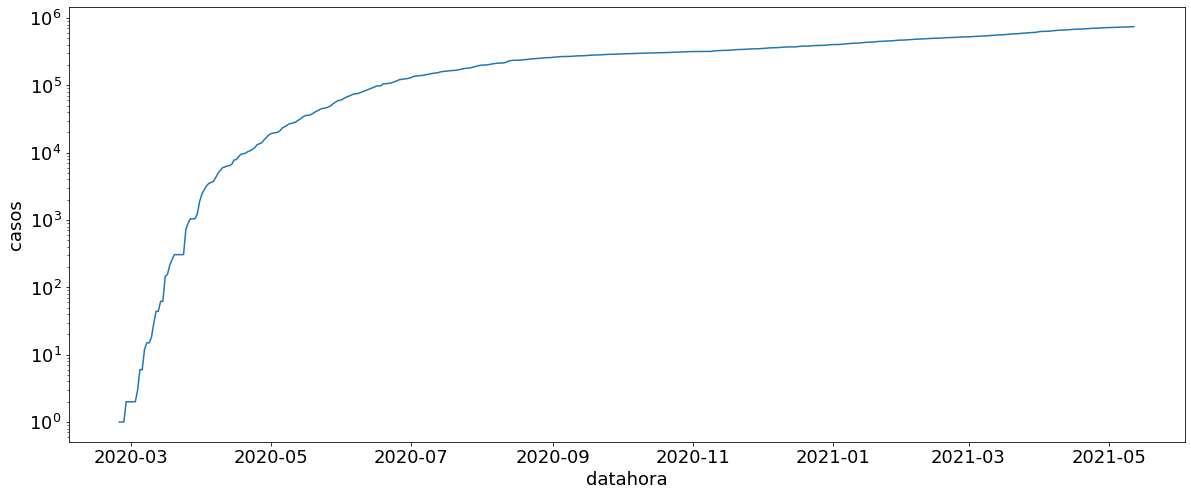

In [ ]:
sns.lineplot(x='datahora',y='casos',data=dados_sp)
mpl.pyplot.yscale('log')

## Taxa de casos novos

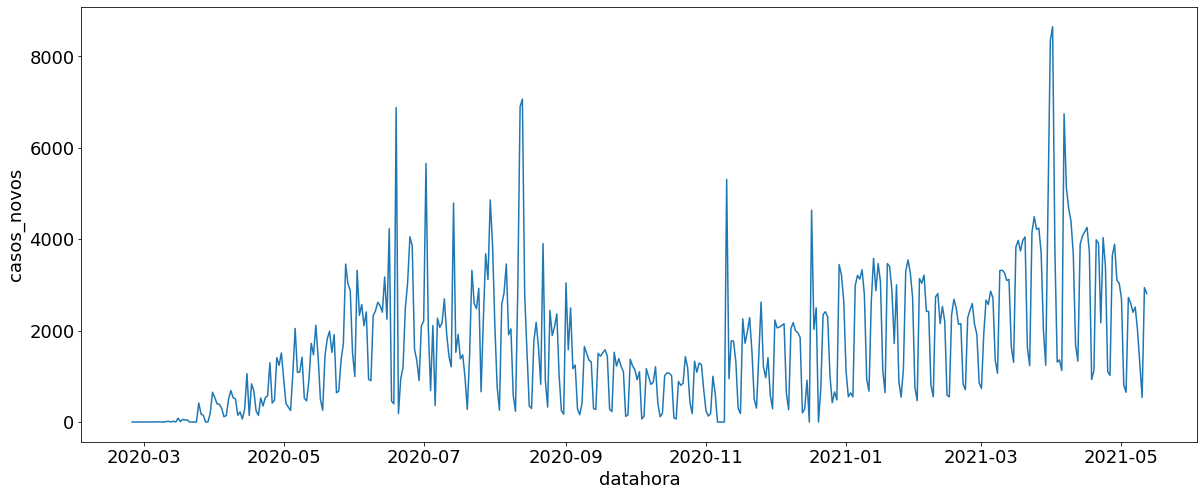

In [ ]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp)

In [ ]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10)) 

In [ ]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

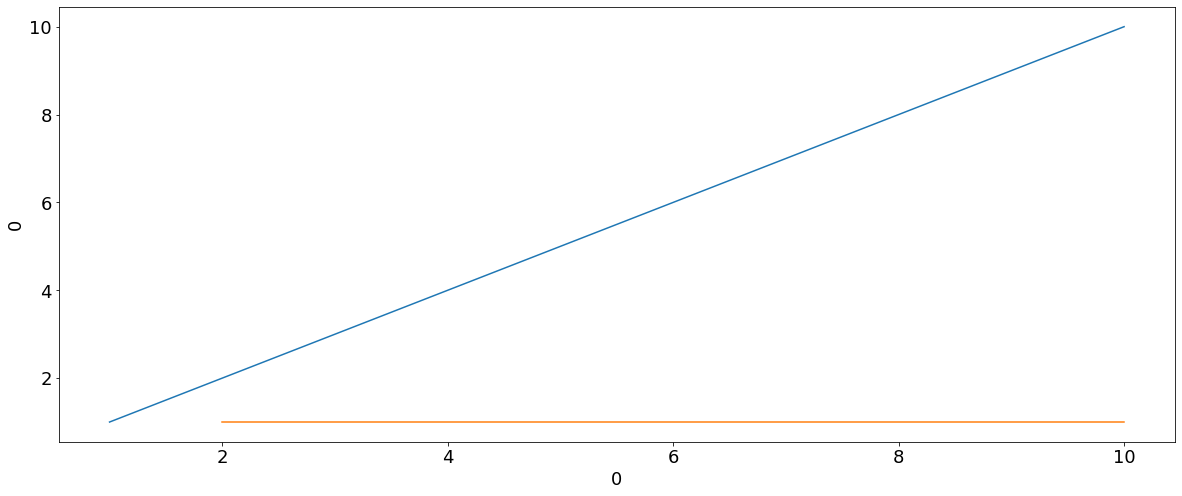

In [ ]:
sns.lineplot(x=0,y=0,data=dados_exemplo)
sns.lineplot(x=0,y='diferenciado',data=dados_exemplo)

In [ ]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

Text(0.5, 1.0, 'Taxa de crescimento de casos em SP')

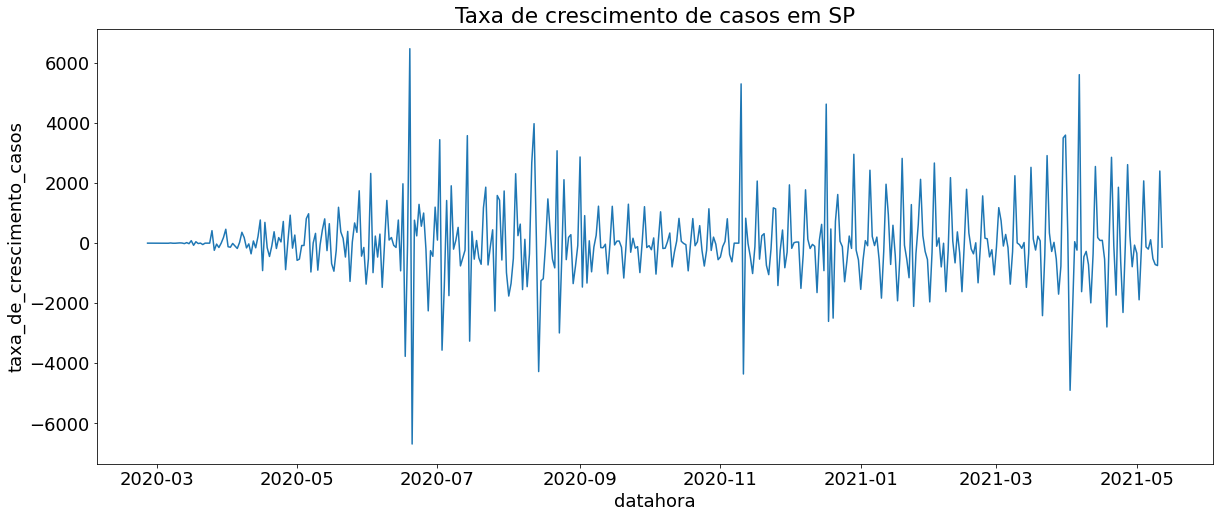

In [ ]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_casos',data=dados_sp).set_title('Taxa de crescimento de casos em SP')
#sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp)

Text(0.5, 1.0, 'Taxa de crescimento de óbitos em SP')

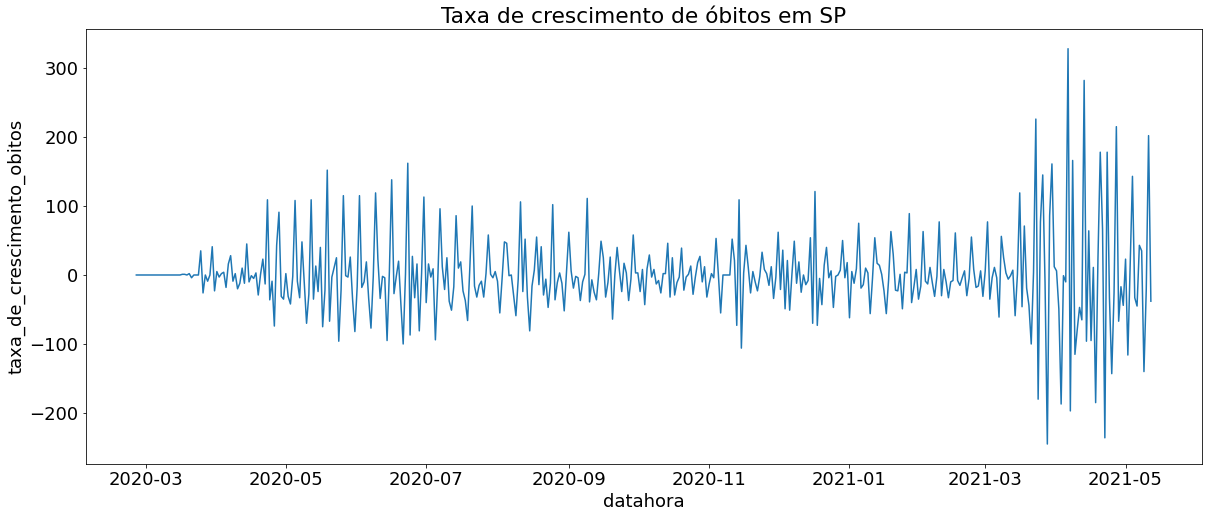

In [ ]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_obitos',data=dados_sp).set_title('Taxa de crescimento de óbitos em SP')

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

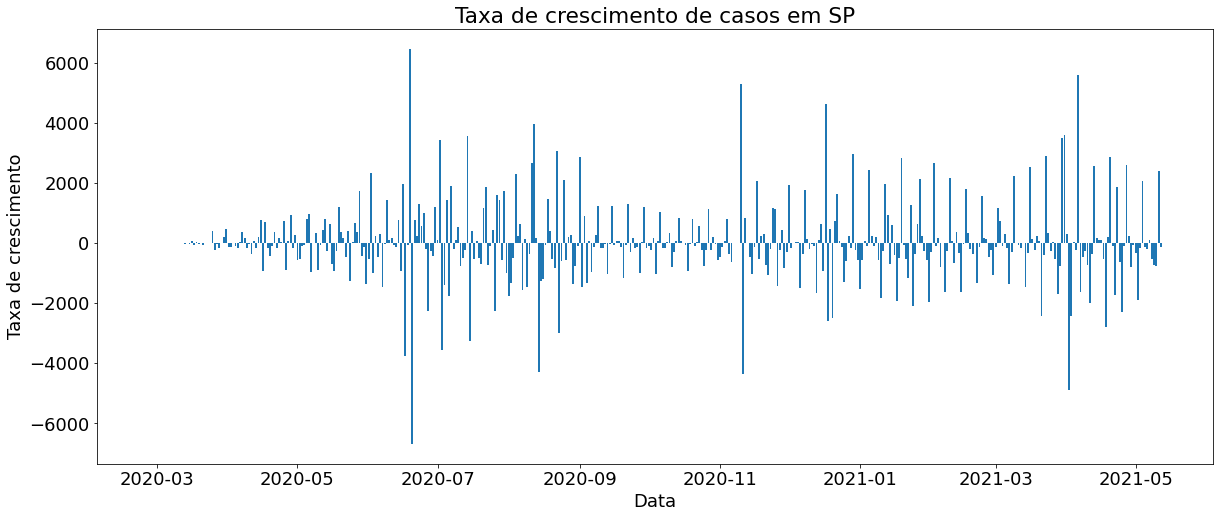

In [ ]:
plt.bar(dados_sp['datahora'],dados_sp['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

In [ ]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [ ]:
dados_2021 = dados_sp.query('ano==2021')

Text(0.5, 0, 'Data')

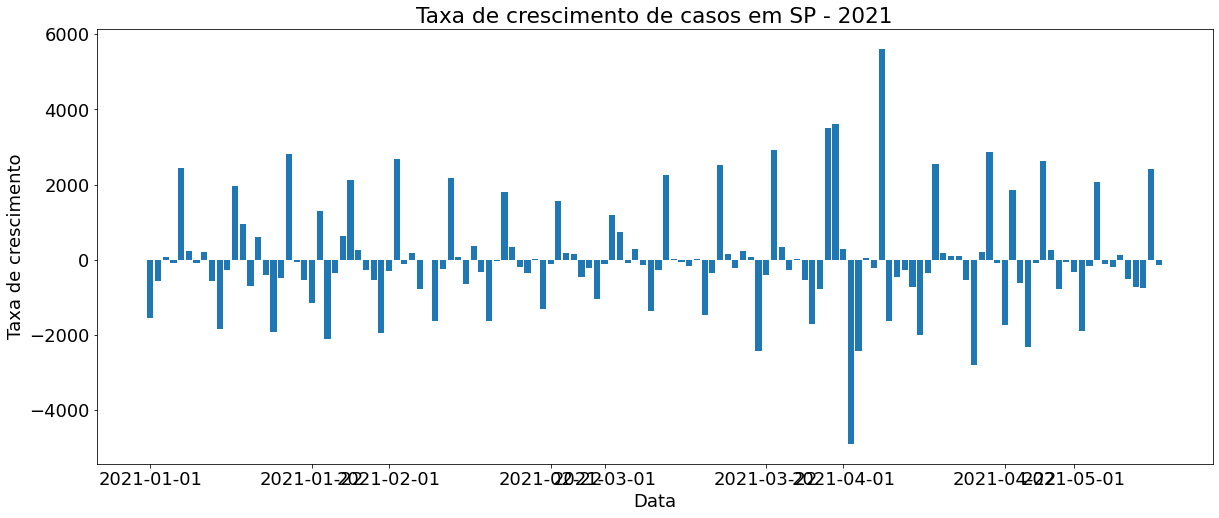

In [ ]:
plt.bar(dados_2021['datahora'],dados_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP - 2021')
plt.ylabel('Taxa de crescimento')
plt.xlabel('Data')

In [ ]:
dados_sp['media_movel_casos']=dados_sp['casos_novos'].rolling(window=7, center=False).mean()

dados_sp['media_movel_obitos']=dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

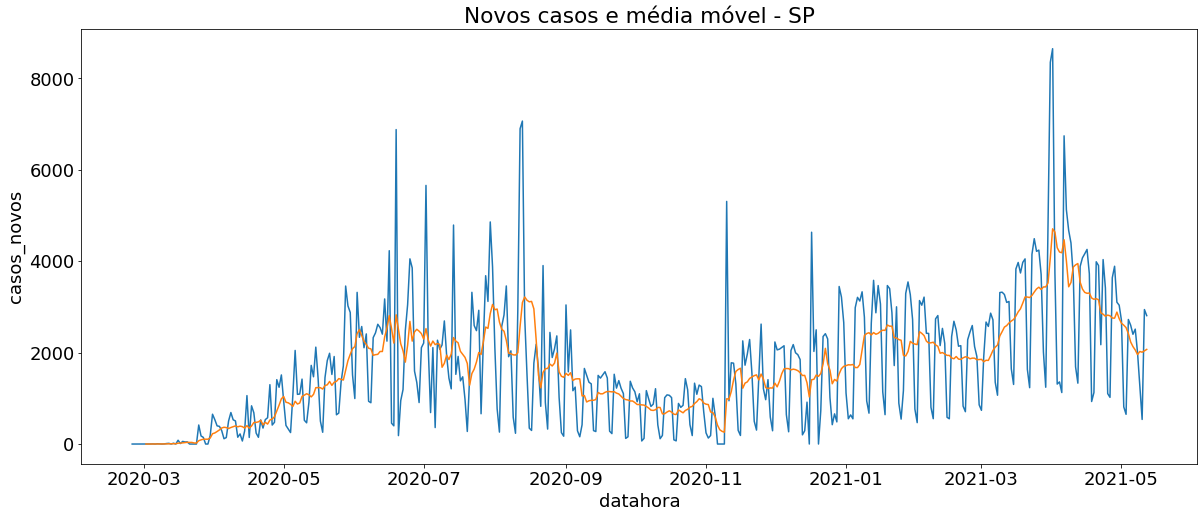

In [ ]:
sns.lineplot(x='datahora',y='casos_novos',data=dados_sp).set_title('Novos casos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_casos',data=dados_sp)

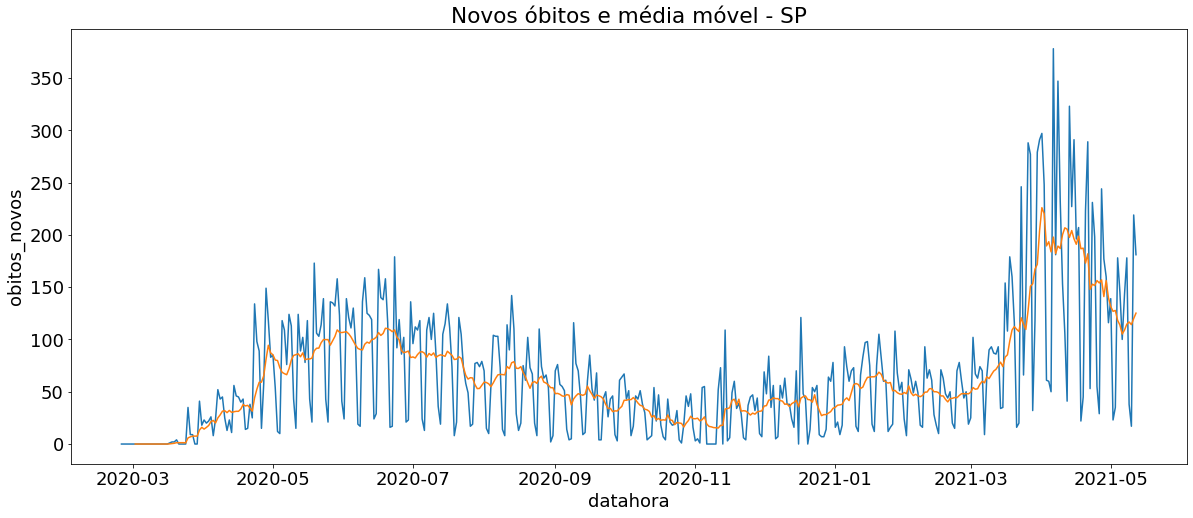

In [ ]:
sns.lineplot(x='datahora',y='obitos_novos',data=dados_sp).set_title('Novos óbitos e média móvel - SP')
sns.lineplot(x='datahora',y='media_movel_obitos',data=dados_sp)

In [ ]:
dados_sp['taxa_de_crescimento_media_movel_casos'] = dados_sp['media_movel_casos'].diff()
dados_sp['taxa_de_crescimento_media_movel_obitos'] = dados_sp['media_movel_obitos'].diff()

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de casos em SP')

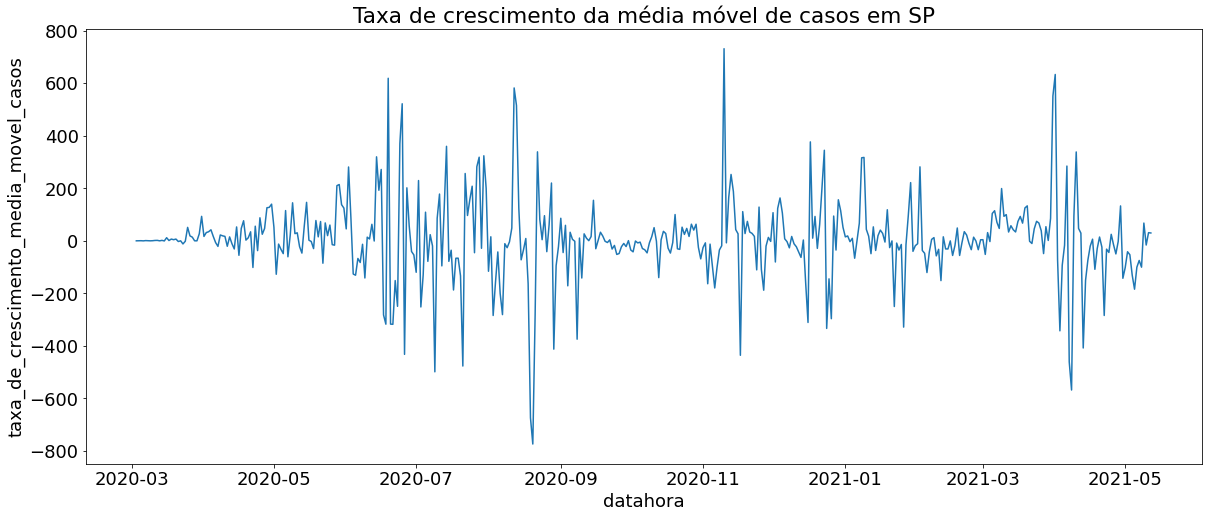

In [ ]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_casos',data=dados_sp).set_title('Taxa de crescimento da média móvel de casos em SP')

Text(0.5, 1.0, 'Taxa de crescimento da média móvel de óbitos em SP')

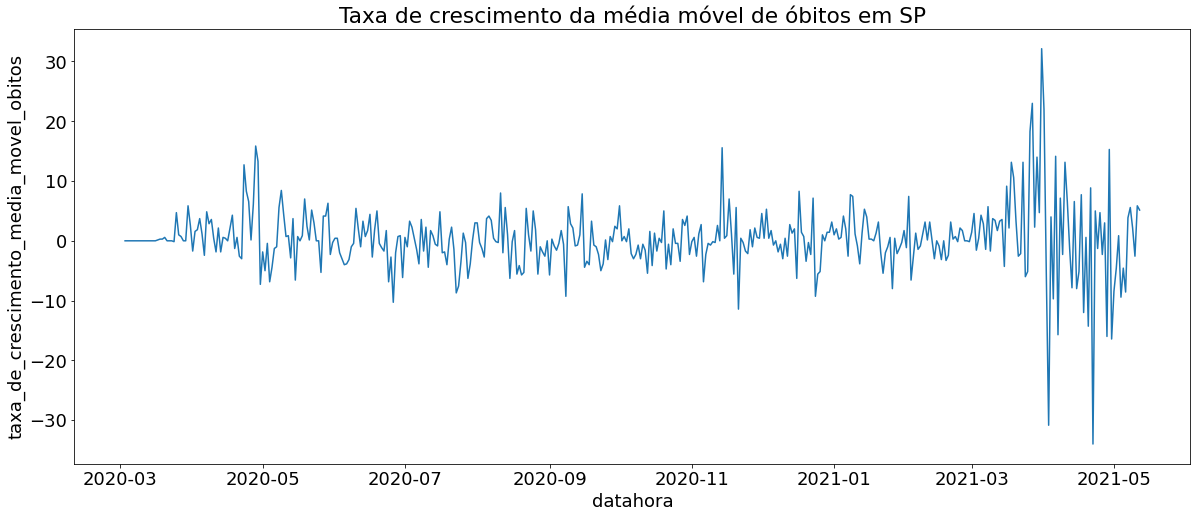

In [ ]:
sns.lineplot(x='datahora',y='taxa_de_crescimento_media_movel_obitos',data=dados_sp).set_title('Taxa de crescimento da média móvel de óbitos em SP')

## Correlação

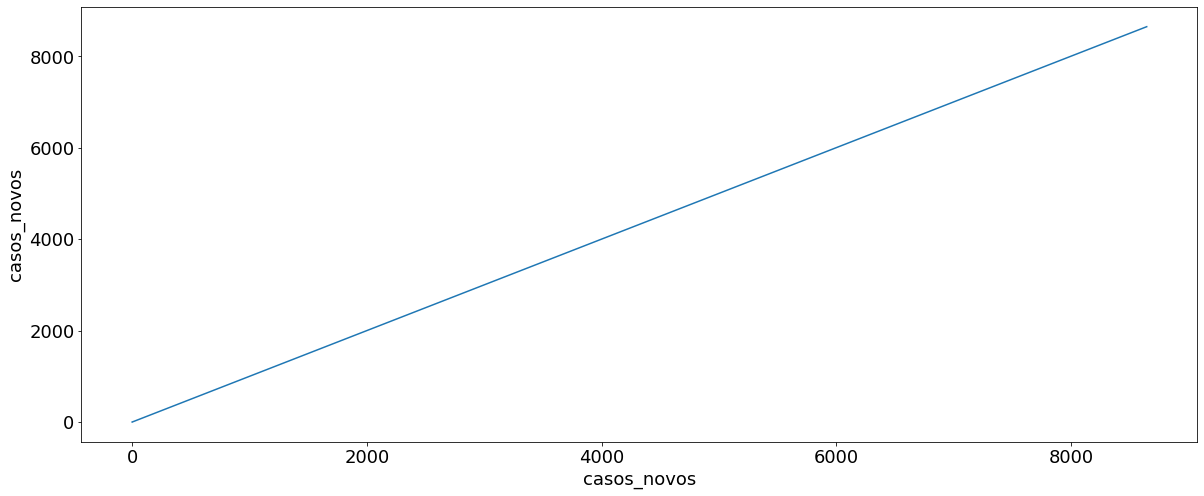

In [ ]:
sns.lineplot(x='casos_novos',y='casos_novos',data=dados_sp)

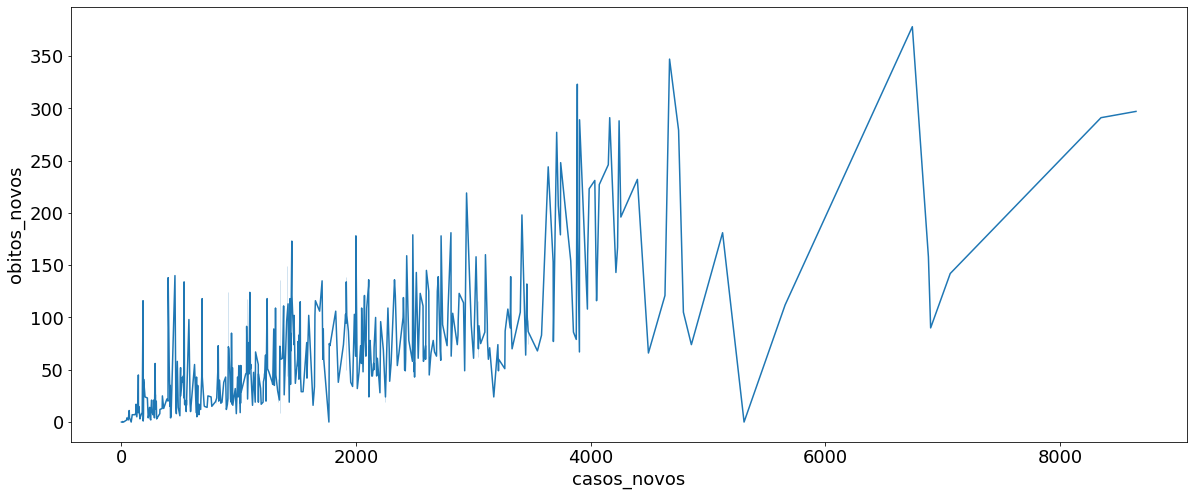

In [ ]:
sns.lineplot(x='casos_novos',y='obitos_novos',data=dados_sp)

In [ ]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dado_202102 = dados_sp.query('mes==2 & ano==2021')

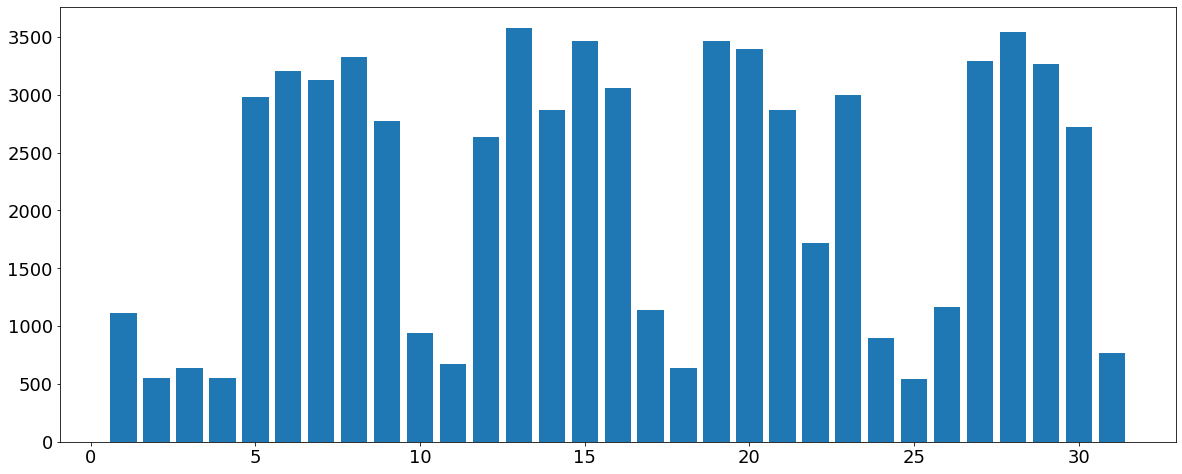

<BarContainer object of 28 artists>

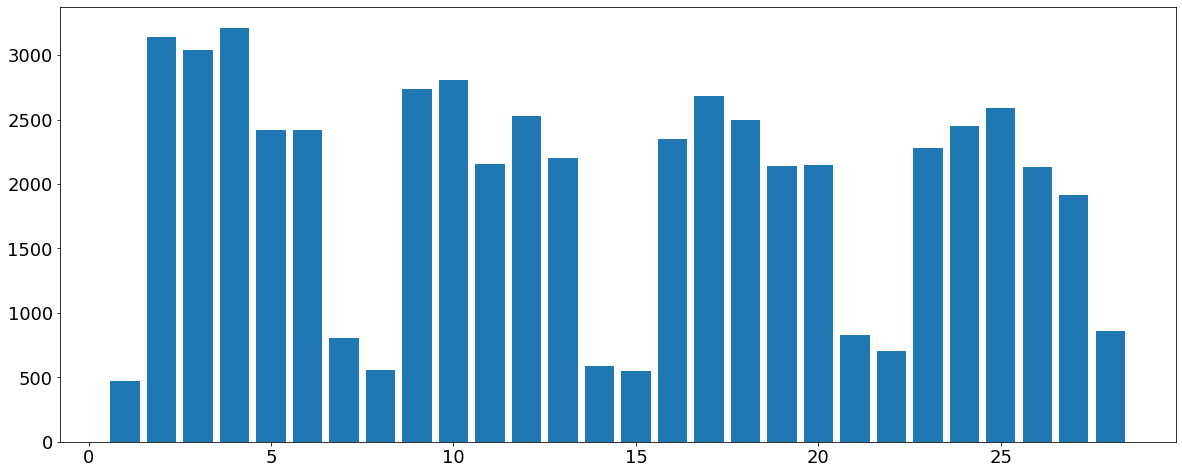

In [ ]:
plt.bar(np.linspace(1,31,31),dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1,28,28),dado_202102['casos_novos'])

## Função de autocorrelação

In [ ]:
from pandas.plotting import autocorrelation_plot

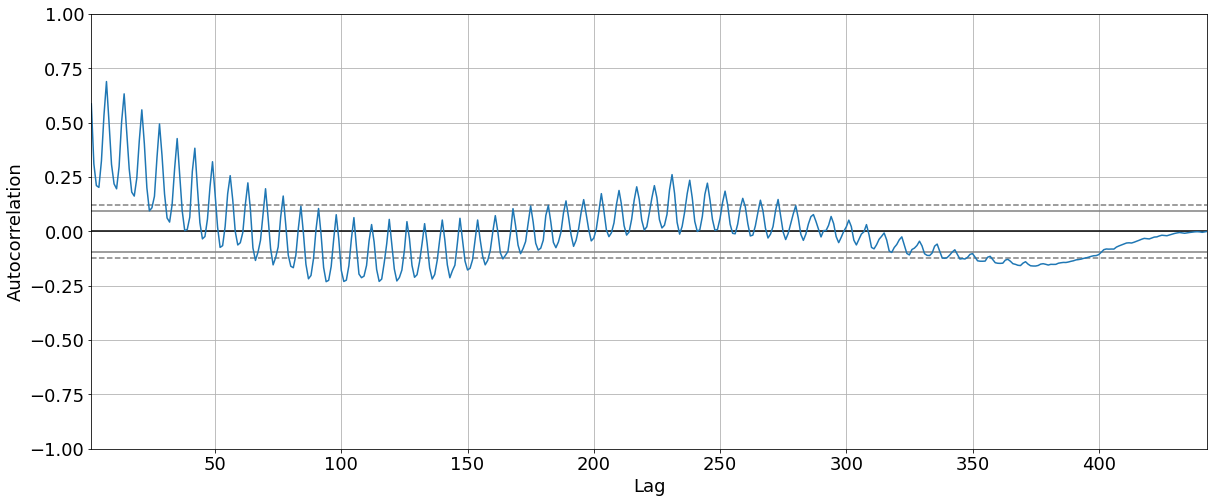

In [ ]:
autocorrelation_plot(dados_sp['casos_novos'])

In [ ]:
dados_sp.shape

(443, 33)

In [ ]:
aleatorio = np.random.rand(435)

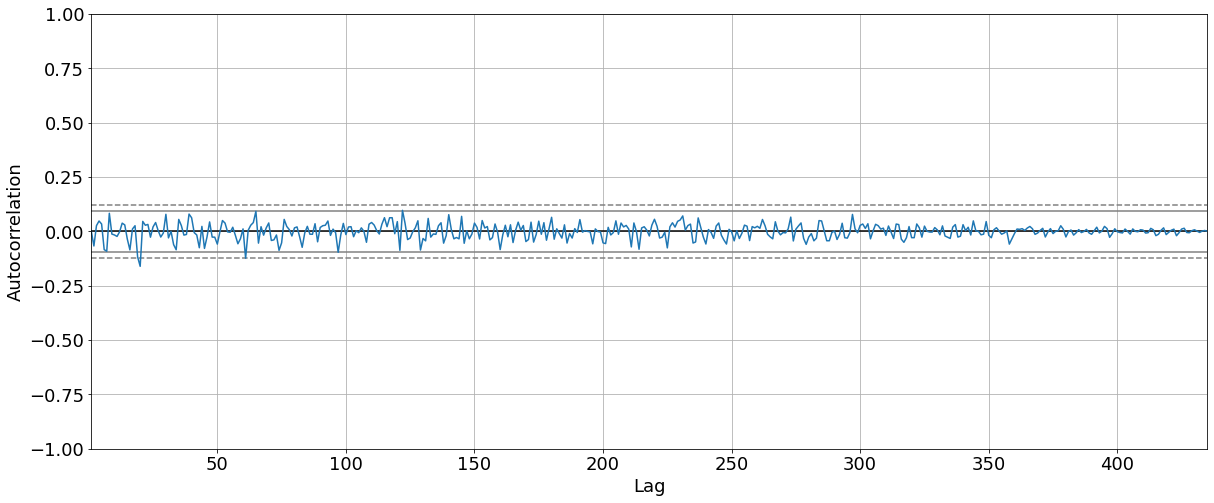

In [ ]:
autocorrelation_plot(aleatorio)